In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from CSV file
df = pd.read_csv('deposit_data.csv')

# Display the first few rows of the DataFrame
print(df.head())


   finance_person_id  deposit_amount  expected_deposit_amount  \
0              41794     28799521.77              28646465.76   
1              51270     13445341.36              12965841.59   
2              31619      8457164.88               8547218.21   
3              51232       740431.00                784292.93   
4              51509     46193484.99              46106964.77   

   time_to_deposit  historical_discrepancies  
0            14.32                         0  
1            14.19                         1  
2            18.93                         1  
3            20.71                         2  
4            34.86                         2  


# Step 2 Implement Isolation Forest


In [ ]:
# Initialize and train Isolation Forest
contamination_rate = 0.1  # Set this to an estimated proportion of anomalies in your data
clf = IsolationForest(contamination=contamination_rate, random_state=42)
clf.fit(df[['deposit_amount', 'expected_deposit_amount', 'time_to_deposit', 'historical_discrepancies']])

# Predict anomalies
df['anomaly_score'] = clf.decision_function(df[['deposit_amount', 'expected_deposit_amount', 'time_to_deposit', 'historical_discrepancies']])
df['anomaly'] = clf.predict(df[['deposit_amount', 'expected_deposit_amount', 'time_to_deposit', 'historical_discrepancies']])

# Map anomaly values (-1: anomaly, 1: normal)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# Show results
print(df.head(20))
print("Number of anomalies detected:", df['anomaly'].sum())

# Save the DataFrame with anomalies detected to CSV
df.to_csv('bank_deposit_data_with_anomalies.csv', index=False)


    finance_person_id  deposit_amount  expected_deposit_amount  \
0               41794    2.879952e+07              28646465.76   
1               51270    1.344534e+07              12965841.59   
2               31619    8.457165e+06               8547218.21   
3               51232    7.404310e+05                784292.93   
4               51509    4.619348e+07              46106964.77   
5               21012    5.831816e+06               5673586.02   
6               30711    4.579190e+07              55040882.43   
7               32046    4.716950e+07              46967220.27   
8               30516    7.404310e+05                524538.58   
9               50101    7.404310e+05                499947.76   
10              41763    7.404310e+05                699662.81   
11              30321    4.578580e+06               4462118.14   
12              51330    9.652350e+06               9575502.09   
13              21413    1.057416e+07              10678522.76   
14        

# Step 3 Review Anomalies

Detected Anomalies:
      finance_person_id  deposit_amount  expected_deposit_amount  \
0                 41794    2.879952e+07              28646465.76   
4                 51509    4.619348e+07              46106964.77   
6                 30711    4.579190e+07              55040882.43   
7                 32046    4.716950e+07              46967220.27   
14                41834    2.834113e+07              28533785.78   
...                 ...             ...                      ...   
1282              50389    2.973577e+07              29718939.67   
1294              30839    3.714217e+07              68361690.13   
1307              12081    3.263061e+06               3032863.31   
1323              50583    3.631347e+07              36348584.01   
1324              21643    3.711800e+07              37454453.62   

      time_to_deposit  historical_discrepancies  anomaly_score  anomaly  
0               14.32                         0      -0.043216        1  
4              

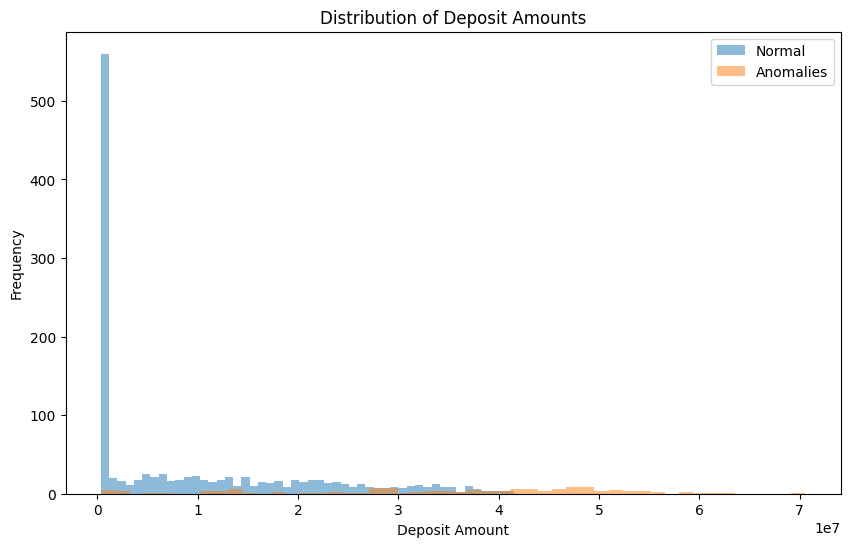

In [ ]:
# Review detected anomalies
anomalies = df[df['anomaly'] == 1]
print("Detected Anomalies:")
print(anomalies)

# Plot the distribution of deposit amounts for anomalies and normal transactions
plt.figure(figsize=(10, 6))
plt.hist(df[df['anomaly'] == 0]['deposit_amount'], bins=50, alpha=0.5, label='Normal')
plt.hist(df[df['anomaly'] == 1]['deposit_amount'], bins=50, alpha=0.5, label='Anomalies')
plt.legend()
plt.xlabel('Deposit Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Deposit Amounts')
plt.show()


# Step 4 Identify Fraudulent Hubs

<ipython-input-12-f87b47be66d6>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city_hub', y='anomaly_count', data=top_city_hubs, palette='viridis')


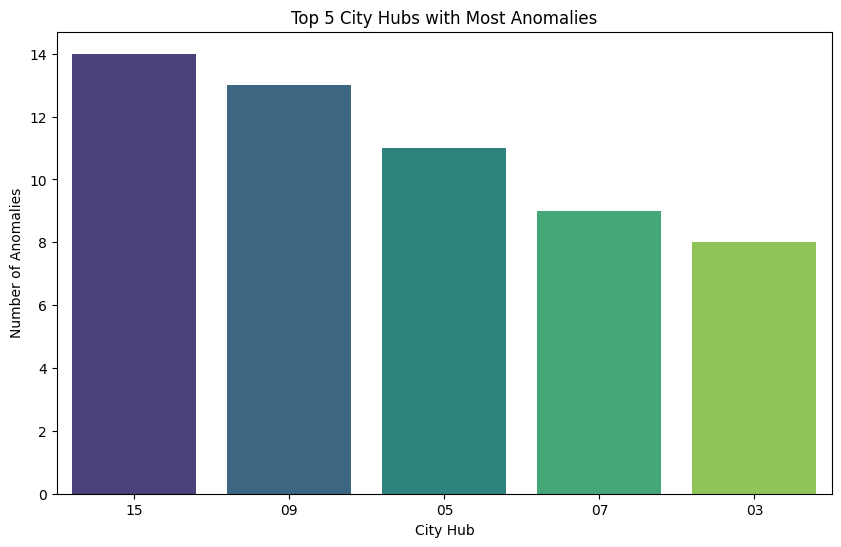

In [ ]:
# Load the dataset with anomalies detected from CSV file
df = pd.read_csv('bank_deposit_data_with_anomalies.csv')

# Ensure 'finance_person_id' is of string type
df['finance_person_id'] = df['finance_person_id'].astype(str)

# Extract city hub information
df['city_hub'] = df['finance_person_id'].str[1:3]

# Count anomalies by city hub
city_hub_anomalies = df[df['anomaly'] == 1]['city_hub'].value_counts().reset_index()
city_hub_anomalies.columns = ['city_hub', 'anomaly_count']

# Plot top city hubs with most anomalies
top_city_hubs = city_hub_anomalies.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='city_hub', y='anomaly_count', data=top_city_hubs, palette='viridis')
plt.xlabel('City Hub')
plt.ylabel('Number of Anomalies')
plt.title('Top 5 City Hubs with Most Anomalies')
plt.show()

01 Jakarta Barat
02 Jakarta Selatan
03 Jakarta Timur
04 Jakarta Utara
05 Depok
06 Surabaya
07 Buleleng
08 Denpasar
09 Bogor
10 Garut
11 Cirebon
12 Bekasi
13 Cilegon
14 Malang Raya
15 Bandung Raya
16 Lampung
17 Metro
18 Serang
19 Tangerang
20 Semarang Raya